# Introduction to NLP Fundamentals in Tensorflow

NLP has the goal of deriving information out of natural language (could be sequences text or speech)

Another common term for NLP problems is sequence to sequence problems (seq2seq).

## Check for GPU

In [ ]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Get helper functions


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for the notebook

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2021-10-16 00:19:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-10-16 00:19:58 (108 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a text dataset

The dataset we're going to be using is Kaggle Introduction to NLP dataset (text samples of Tweets labelled as dister or not disaster).

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip data
unzip_data("nlp_getting_started.zip")

--2021-10-16 00:20:00--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.127.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2021-10-16 00:20:00 (130 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing a text dataset

To visualize our text samples, we first have to read them in, one way to do would be to use Python. 

But I prefer to get visual straight away.

So another way to do this is to use pandas...

In [ ]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Shuffle trianing dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# What does the test dataframe look like
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many examples of each class?
train_df.target.value_counts(normalize=True)

0    0.57034
1    0.42966
Name: target, dtype: float64

In [ ]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher that total num samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
    _, text, target = row
    print(f'Target: {target}', '(real disaster)' if target > 0 else '(not real disaster)')
    print(f'Text:\n{text}\n')
    print('---\n')

Target: 0 (not real disaster)
Text:
I found a diamond in the rubble

---

Target: 1 (real disaster)
Text:
Crazy storm hit and I'm trapped inside a Hobby Lobby AMA http://t.co/8qc8Bcxoko

---

Target: 1 (real disaster)
Text:
@bettyfreedoms @AbnInfVet hillary mass murderer.

---

Target: 0 (not real disaster)
Text:
@DrDrewHLN             'A simple meltdown!'  Areva have you ever seen an out of control kid?

---

Target: 1 (real disaster)
Text:
@Jenniferarri_ comeeeee! ...but why is it bout to storm tho

---



## Split data into trianing and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Use train_test_split to split trianing data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'],
                                                                            train_df_shuffled['target'],
                                                                            test_size = 0.1, # use 10% data for val split
                                                                            random_state = 42) 

In [ ]:
# Check the lenghts
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(5921    @mogacola @zamtriossu i screamed after hitting...
 3904              Imagine getting flattened by Kurt Zouma
 2804    @Gurmeetramrahim #MSGDoing111WelfareWorks Gree...
 3718    @shakjn @C7 @Magnums im shaking in fear he's g...
 1667    Somehow find you and I collide http://t.co/Ee8...
 4435    @EvaHanderek @MarleyKnysh great times until th...
 2544                     destroy the free fandom honestly
 7223    Weapons stolen from National Guard Armory in N...
 4265    @wfaaweather Pete when will the heat wave pass...
 6568    Patient-reported outcomes in long-term survivo...
 Name: text, dtype: object, 5921    0
 3904    0
 2804    1
 3718    0
 1667    0
 4435    1
 2544    1
 7223    0
 4265    1
 6568    1
 Name: target, dtype: int64)

## Converting text to numbers

When dealing with text problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers.

There are few ways to do this, namely:
* Tokenization - direct mapping of token (a token could be a word or a character to number)
* Embedding - Create a matrix of feature vector to each token (the size of the feature vector can be defined adn this embedding can be learned). 

### Text vectorization (tokenization)

In [ ]:
train_sentences[:5]

5921    @mogacola @zamtriossu i screamed after hitting...
3904              Imagine getting flattened by Kurt Zouma
2804    @Gurmeetramrahim #MSGDoing111WelfareWorks Gree...
3718    @shakjn @C7 @Magnums im shaking in fear he's g...
1667    Somehow find you and I collide http://t.co/Ee8...
Name: text, dtype: object

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import TextVectorization

# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (automatically add <OOV>)
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None, # Create group of n-words
                                    output_mode='int', # how to map token to numbers
                                    output_sequence_length=None, # how long do you want your sequences to be?
                                    )

In [ ]:
# Find the average number of tokens (words) int the trianing tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words to ahve in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a ranodm sentence from training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f'Original text: \n {random_sentence} \
      \n \nVectorized version:')
text_vectorizer([random_sentence])

Original text: 
 @nbc I wanna see you reboot The Fresh Prince of Bel-Air bring back the original cast and everything &amp; do nothing that will ruin the show.       
 
Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[5059,    8,  473,   99,   12, 9300,    2, 2453, 2784,    6,    1,
         962,   88,    2, 1623]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all the unique words in our training data
top_5_words = words_in_vocab[:5] # get the most common words
bottom_5_words  = words_in_vocab[-5:] # least common words
print(f'Number of words in vocab:{len(words_in_vocab)}')
print(f'5 most common words: {top_5_words}')
print(f'5 least common words: {bottom_5_words}')

Number of words in vocab:10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating and Embedding using an Embedding Layer

To make our emebedding, we're going to user TF Embedding Layer.

The parameters we care most abour for our embedding layer:
* `input_dim` = The size of our vocabulary
* `output_dim` = The size of the output embedding vector, for example a value of a 100 would mean each token gets represented by a vector of 100 long.
* `input_length` = length of sequences being passed to the embedding layer.



In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length, # set input shape
                             output_dim = 128, # output shape
                             embeddings_initializer = 'uniform', 
                             input_length = max_length, # how long is each input
                             )

embedding 

In [ ]:
# Get a random senteces from the training set
random_sentence = random.choice(train_sentences)
print(f'Original text: \n {random_sentence} \
        \n \n Embedded verison:')

# Embed the random sentence (turn it into dense vector of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text: 
 wild night in the village of pugwash every fire truck is out that the town has which is like a fire truck for every house -population:6         
 
 Embedded verison:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.03561047,  0.02039744,  0.04772817, ..., -0.02264531,
         -0.01662079, -0.02330225],
        [ 0.03602863, -0.02768411, -0.00427003, ...,  0.01470428,
          0.0375683 ,  0.02550933],
        [ 0.04594273,  0.03274738,  0.0314323 , ...,  0.02824939,
          0.03739486,  0.03738607],
        ...,
        [ 0.02423612,  0.03327465, -0.04169097, ..., -0.01535348,
          0.00780933, -0.00138791],
        [-0.0208944 , -0.03771166,  0.03548422, ...,  0.03442404,
         -0.00228677,  0.02095672],
        [ 0.03193394, -0.02770743, -0.00516076, ...,  0.00743333,
         -0.01032876, -0.00047619]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.03561047,  0.02039744,  0.04772817, -0.02420483, -0.04915066,
         0.03671917,  0.01816772, -0.04244798,  0.03853078,  0.01432859,
        -0.03382832,  0.02117398, -0.00220992,  0.04258804,  0.04894587,
        -0.01783406,  0.04197354, -0.01341261,  0.02310697, -0.01442792,
        -0.01427601, -0.02115566,  0.03125418,  0.04966834, -0.00644205,
         0.03597857,  0.00576469, -0.01474761, -0.00853105,  0.00536472,
        -0.04640743,  0.00213591, -0.01320829,  0.0378372 , -0.01353092,
        -0.03869985,  0.03208316, -0.0365242 ,  0.02408094, -0.01769527,
         0.02551718,  0.04398017,  0.00988208,  0.01086827,  0.0320929 ,
        -0.00310081,  0.02880714, -0.03637576, -0.02378069,  0.03120532,
         0.02759274,  0.04618181,  0.03444244,  0.02849314,  0.02538465,
        -0.00737317,  0.03302082,  0.00724877, -0.03027376,  0.01802934,
         0.03506562, -0.03129049,  0.01842434, -0.01487554,  0.00766376,
  

## Modelling a text dataset (running a series of experiments)

Now we've got a way to turn our text sequences into numbers, it's time to start building a series of modelling experiments.

We'll start with a baseline and move on from there.

* Model 0: Naive Bayes (baseline)
* Model 1: Feed-forward neural network
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D convolutional neural netwrok (CNN)
* Model 6: Tensorflow Hub Pretrained Feature Extractor (using transfer learning for NLP)
* Model 7: Same as model 6 with 10% of training data.

How are we going to approach all of these?
Use the standard steps in modelling with tensorflow:

* Create a model
* Build a model
* Fit a model 
* Evaluate a model


### Model 0: Getting a baseline

As with all machine learning modelling experiments, it's important to create a baseline model so you've got a becnhmark for future experiments to build upon.

To create our baseline, we'll use Sklearn's Multinomial Naive Bayes using the Tf-idf formula to convert our words to numbers

> 🔑 ** Note:** It's common practice to use non-DL algorithms as a baseline because of their speed and later using DL if you can improve upon them.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), #convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f'Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%')

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
train_df.target.value_counts(normalize=True)

0    0.57034
1    0.42966
Name: target, dtype: float64

### Creating an evaluation function for our model experiments

We could evaluate all of our model's prediction with different metrics every time, however, this would be cumbersome and could easily be fixed with a function

Let's create one to compare our model's prediction with the truth label with the following metrics:
* Accuracy
* Precision
* Recall
* F1-Score

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    '''
    Calculates model accuracy, precision, recall and F1-score of binary classification model.
    '''
    # Calculate model accuracy
    model_accuracy = accuracy_score(y_true, y_pred)*100
    # Calculate model precision, recall and F1-score using "weighted" average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average = 'weighted')
    model_results = {'accuracy':model_accuracy,
                     'precision':model_precision*100,
                     'recall':model_recall*100,
                     'model_f1':model_f1*100}
    return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true = val_labels,
                                     y_pred = baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'model_f1': 78.6218975804955,
 'precision': 81.11390004213173,
 'recall': 79.26509186351706}

### Model 1: Feed-forward neural network (dense model)

In [ ]:
# Create a tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save Tensorboard logs
SAVE_DIR = 'model_logs'

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape =(1, ), dtype= tf.string) # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn input text into numbers
x = embedding(x) # turn numbers into embedding
# x = layers.GlobalAveragePooling1D(name='global_average_pooling')(x)
x = layers.GlobalMaxPool1D(name='global_max_pooling')(x) # condense the feature vector for each token to one vector
outputs = layers.Dense(1, activation='sigmoid')(x) # Create output layer, want binary outputs so use sigmoid
model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_max_pooling (GlobalMa (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
# Fit the model
model_1_history = model_1.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                       experiment_name = 'model_1_dense')])

Saving TensorBoard log files to: model_logs/model_1_dense/20211016-002002
Epoch 1/5
215/215 [==============================] - 3s 10ms/step - loss: 0.6346 - accuracy: 0.6516 - val_loss: 0.5723 - val_accuracy: 0.7585
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4717 - accuracy: 0.8267 - val_loss: 0.4763 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3436 - accuracy: 0.8748 - val_loss: 0.4550 - val_accuracy: 0.7874
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2599 - accuracy: 0.9048 - val_loss: 0.4543 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1989 - accuracy: 0.9349 - val_loss: 0.4697 - val_accuracy: 0.7953


In [ ]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.7953


[0.4697110950946808, 0.7952755689620972]

In [ ]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

(762, 1)

In [ ]:
# look at a single prediction
model_1_pred_probs[0]

array([0.46990615], dtype=float32)

In [ ]:
# Look at the first 10 preds
model_1_pred_probs[:10]

array([[0.46990615],
       [0.83853847],
       [0.9893642 ],
       [0.04136598],
       [0.251877  ],
       [0.9470936 ],
       [0.89903784],
       [0.98879457],
       [0.8964163 ],
       [0.08868673]], dtype=float32)

In [ ]:
# convert model predictions probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate our model_1 results 
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred= model_1_preds)
model_1_results

{'accuracy': 79.52755905511812,
 'model_f1': 79.2670847397923,
 'precision': 79.96696917122648,
 'recall': 79.52755905511812}

## Visualizing learned embeddings 

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_max_pooling (GlobalMa (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Get the weight matrix of embedding layer
# (these are the numerical reprsentations of each token in our training data, which have been learned for 5 epochs)
embed_weights = model_1.get_layer('embedding').get_weights()[0]
print(embed_weights.shape) # same size as vocab size and embedding_dim (output dim of embedding layer)

(10000, 128)


Now we've got the embedding matrix our model has learned to represent our tokens, lets see how we can visualize it.

To do so, Tensorflow has a handy tool called Tensorflow projector: https://projector.tensorflow.org/

And Tensorflow also has an incredible guide on word embeddings: https://www.tensorflow.org/text/guide/word_embeddings

In [ ]:
# Create embedding files (we got this from Tensorflow Words embedding documentation)
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent neural network (RNN's)

RNN's are useful for sequence data.

The premise of a recurrent neural network is to use the representation of a previous input to aid the representation of a later input.

### Model 2: LSTM

LSTM = Long short term memory (one of the most popular LSTM cells)

Our strucutre of an RNN typically looks like this:
```
Input (text) -> tokenize -> embedding -> layers (RNNs/Dense) -> Output (label probability)


In [ ]:
# Create an LSTM model
from tensorflow.keras import layers

inputs = layers.Input(shape = (1,), dtype = 'string')
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
# x = layers.LSTM(64, return_sequences=True, )(x) # when you're stacking RNN cells together, you need to return sequence s
# print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name = 'model_2_LSTM')


In [ ]:
# Get a summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,333,633
Trainable params: 1,333,633
Non-trainable params: 0
____________________________________________

In [ ]:
# Compile the model
model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
# Fit the model
model_2.fit(x = train_sentences,
            y = train_labels,
            epochs = 5,
            validation_data = (val_sentences, val_labels),
            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                     'model_2_LSTM')])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20211016-002014
Epoch 1/5
215/215 [==============================] - 6s 19ms/step - loss: 0.3711 - accuracy: 0.8464 - val_loss: 0.4583 - val_accuracy: 0.8018
Epoch 2/5
215/215 [==============================] - 4s 16ms/step - loss: 0.2400 - accuracy: 0.9061 - val_loss: 0.5575 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 4s 16ms/step - loss: 0.1701 - accuracy: 0.9343 - val_loss: 0.6347 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.1323 - accuracy: 0.9489 - val_loss: 1.0197 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 4s 16ms/step - loss: 0.0941 - accuracy: 0.9603 - val_loss: 0.9131 - val_accuracy: 0.7703


In [ ]:
# make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[1.3770056e-01],
       [5.5000967e-01],
       [9.9983841e-01],
       [4.5214266e-02],
       [8.1709027e-04],
       [9.9998999e-01],
       [9.9105394e-01],
       [9.9999171e-01],
       [9.9999321e-01],
       [9.0334815e-01]], dtype=float32)

In [ ]:
# Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model 2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred = model_2_preds)
model_2_results

{'accuracy': 77.03412073490814,
 'model_f1': 76.73435495786339,
 'precision': 77.39543961790544,
 'recall': 77.03412073490814}

### Model 3: GRU

Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.

In [ ]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape =(1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.GRU(64, return_sequences=True)(x) # if you want to stack recurrent layers on the top of each other, you need return_sequences = true
# x = layers.LSTM(64, return_sequences=True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation = 'relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name = 'model_3_GRU')

In [ ]:
# Get a summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 1,321,473
Trainable params: 1,321,473
Non-trainable params: 0
_____________________________________________

In [ ]:
# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

In [ ]:
# Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'model_3_GRU')])

Saving TensorBoard log files to: model_logs/model_3_GRU/20211016-002037
Epoch 1/5
215/215 [==============================] - 6s 18ms/step - loss: 0.2174 - accuracy: 0.9091 - val_loss: 0.6545 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.1002 - accuracy: 0.9651 - val_loss: 0.8205 - val_accuracy: 0.7625
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0725 - accuracy: 0.9717 - val_loss: 1.2312 - val_accuracy: 0.7402
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0635 - accuracy: 0.9730 - val_loss: 1.2813 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0563 - accuracy: 0.9766 - val_loss: 1.2519 - val_accuracy: 0.7677


In [ ]:
# Make some predictions with our GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

array([[2.1456778e-03],
       [6.8558645e-01],
       [9.9994552e-01],
       [3.5484910e-02],
       [8.5974178e-05],
       [9.9997938e-01],
       [9.9058378e-01],
       [9.9999279e-01],
       [9.9998647e-01],
       [9.9897027e-01]], dtype=float32)

In [ ]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calcualte model 3 results
model_3_results = calculate_results(y_true = val_labels,
                                    y_pred = model_3_preds)
model_3_results

{'accuracy': 76.77165354330708,
 'model_f1': 76.63871505080738,
 'precision': 76.79905783589133,
 'recall': 76.77165354330708}

### Model 4: Bidirectional RNN

Normal RNN's go from left to right (just like you'd read an English sentence) however, a bidirectional RNN goes from right to left as well as left to right.

In [ ]:
# Build a bidirectional RNN in tensorflow
from tensorflow.keras import layers
inputs = layers.Input(shape=(1, ), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.GRU(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs, name = 'model_4_bidirectional')

In [ ]:
# Get summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model
model_4.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_4_bidirecional')])

Saving TensorBoard log files to: model_logs/model_4_bidirecional/20211016-002100
Epoch 1/5
215/215 [==============================] - 10s 33ms/step - loss: 0.1361 - accuracy: 0.9494 - val_loss: 0.8500 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0577 - accuracy: 0.9752 - val_loss: 1.0898 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0487 - accuracy: 0.9778 - val_loss: 1.2906 - val_accuracy: 0.7454
Epoch 4/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0514 - accuracy: 0.9755 - val_loss: 1.2689 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0415 - accuracy: 0.9799 - val_loss: 1.4955 - val_accuracy: 0.7638


In [ ]:
# Make predictions withour bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[4.0790439e-04],
       [9.7034097e-01],
       [9.9998951e-01],
       [2.3803705e-01],
       [1.2750983e-05],
       [9.9948037e-01],
       [9.9759549e-01],
       [9.9999392e-01],
       [9.9999332e-01],
       [9.9589825e-01]], dtype=float32)

In [ ]:
# Convert pred probs to pred labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate the results of our bidirectional model
model_4_results = calculate_results(y_true = val_labels,
                                    y_pred = model_4_preds)
model_4_results

{'accuracy': 76.37795275590551,
 'model_f1': 76.33188054110938,
 'precision': 76.3377762834769,
 'recall': 76.37795275590551}

## Convolutional Neural Networks for Text (and other type of sequences)

We've used CNNs for images but images are typically 2D (height x width)... however our, text data is 1D.

Previously we used Conv2D for our image data but now we're going to use Conv1D. 

The typical structure of a Conv1D model for sequences (in our case, text):
```
Inputs (text) -> tokenization -> Embedding -> Layer(s) (typically 1D Conv1D + pooling) -> Outputs (class probabilities)
```


### Model 5: Conv1D 


In [ ]:
# Test out our embedding layer, Conv1D layer and max pooling.

embedding_test = embedding(text_vectorizer(['this is a test sentes'])) # turn target sequence into embedding
conv_1d = layers.Conv1D(filters= 32 , 
                        kernel_size = 5,
                        strides = 1,
                        activation = 'relu',
                        padding = 'same',)
conv_1d_output = conv_1d(embedding_test) #pass test embedding through conv1d layer
max_pool = layers.GlobalAveragePooling1D()
max_pool_output = max_pool(conv_1d_output) # equivalent to 'get the most important feature' or 'get the feature with the highest value'

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [ ]:
#embedding_test

In [ ]:
#conv_1d_output

In [ ]:
#max_pool_output

In [ ]:
# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1, ), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, strides=1, activation='relu', padding='valid')(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation = 'relu')(X)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs, name='model_5_Conv1d')

# Compile Conv1D
model_5.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Get a summary
model_5.summary()

Model: "model_5_Conv1d"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 64)            41024     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 1,321,089
Trainable params: 1,321,089
Non-trainable params: 0
__________________________________________

In [ ]:
# Fit the model
model_5_history = model_5.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'Conv1D')])

Saving TensorBoard log files to: model_logs/Conv1D/20211016-002132
Epoch 1/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1467 - accuracy: 0.9578 - val_loss: 0.8244 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0771 - accuracy: 0.9730 - val_loss: 0.9487 - val_accuracy: 0.7585
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0608 - accuracy: 0.9777 - val_loss: 1.0355 - val_accuracy: 0.7546
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0572 - accuracy: 0.9787 - val_loss: 1.0846 - val_accuracy: 0.7467
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0518 - accuracy: 0.9796 - val_loss: 1.1013 - val_accuracy: 0.7520


In [ ]:
# Make some predictions with our Conv1D model
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[2.2032064e-01],
       [7.1271574e-01],
       [9.9990976e-01],
       [6.5871537e-02],
       [1.4135354e-06],
       [9.8810625e-01],
       [9.5694649e-01],
       [9.9998754e-01],
       [9.9999630e-01],
       [4.7213981e-01]], dtype=float32)

In [ ]:
# Conver model 5 pred probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Evaluate model 5 predictions
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)

### Model 6: TensorFlow Hub pretrained feature extractor

Now we've built a few of our own models, let's try and use transfer learning for NLP, specifically using TensorFlow Hub's using Universal Sentence Encoder.

In [ ]:
sample_sentence

"There's a flood in my street!"

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
embeded_samples = embed([sample_sentence,
                      'When you call the unviersal sentence encoder on a sentence, it turns it into a number'])
print(embeded_samples[0][:50])

tf.Tensor(
[-0.01157025  0.02485911  0.02878051 -0.012715    0.03971541  0.08827761
  0.02680988  0.05589839 -0.01068731 -0.00597293  0.00639321 -0.01819516
  0.00030816  0.09105889  0.05874646 -0.03180629  0.01512474 -0.05162925
  0.00991366 -0.06865345 -0.04209306  0.0267898   0.03011009  0.00321065
 -0.00337968 -0.04787357  0.0226672  -0.00985927 -0.04063615 -0.01292093
 -0.04666382  0.05630299 -0.03949255  0.00517682  0.02495827 -0.07014439
  0.0287151   0.0494768  -0.00633978 -0.08960193  0.02807119 -0.00808364
 -0.01360601  0.05998649 -0.10361788 -0.05195373  0.00232958 -0.02332531
 -0.03758106  0.03327729], shape=(50,), dtype=float32)


In [ ]:
embeded_samples

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.01157025,  0.02485911,  0.02878051, ..., -0.00186124,
         0.02315822, -0.01485021],
       [ 0.03454313, -0.07623312,  0.0106267 , ..., -0.03093249,
        -0.01815026,  0.00910137]], dtype=float32)>

In [ ]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape = [],
                                        dtype = tf.string,
                                        trainable = False, )

In [ ]:
# Create model using the Sequential API
from tensorflow.keras import layers

model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    #layers.Dense(64, activation = 'relu')
    layers.Dense(1, activation = 'sigmoid')
], name = 'model_6_USE')

# Compile
model_6.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 512)               256797824 
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 513       
Total params: 256,798,337
Trainable params: 513
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'tf_hub_sentence_encoder')])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20211016-002204
Epoch 1/5
215/215 [==============================] - 6s 19ms/step - loss: 0.6489 - accuracy: 0.7348 - val_loss: 0.6124 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.5813 - accuracy: 0.7900 - val_loss: 0.5628 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.5383 - accuracy: 0.7965 - val_loss: 0.5309 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.5095 - accuracy: 0.7967 - val_loss: 0.5104 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4894 - accuracy: 0.7997 - val_loss: 0.4958 - val_accuracy: 0.7900


In [ ]:
# Make predictions with USE TF Hub Model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.35804534],
       [0.6822759 ],
       [0.8577531 ],
       [0.3457136 ],
       [0.6488661 ],
       [0.7173376 ],
       [0.8294277 ],
       [0.83851135],
       [0.74211925],
       [0.20122561]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(y_true= val_labels,
                                    y_pred = model_6_preds)
model_6_results

{'accuracy': 79.00262467191601,
 'model_f1': 78.87751851796453,
 'precision': 79.07348439526268,
 'recall': 79.00262467191601}

### Beating the baseline

In [ ]:
# Create model using the Sequential API
from tensorflow.keras import layers

model_6_1 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation = 'sigmoid')
], name = 'model_6_1_USE')

# Compile
model_6_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_6_1.summary()

Model: "model_6_1_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 512)               256797824 
_________________________________________________________________
dense_8 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pretrained embeddings
model_6_1_history = model_6_1.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'tf_hub_sentence_encoder_complex')])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_complex/20211016-002219
Epoch 1/5
215/215 [==============================] - 4s 14ms/step - loss: 0.5156 - accuracy: 0.7754 - val_loss: 0.4490 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4178 - accuracy: 0.8135 - val_loss: 0.4399 - val_accuracy: 0.8031
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4044 - accuracy: 0.8210 - val_loss: 0.4317 - val_accuracy: 0.8136
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3954 - accuracy: 0.8286 - val_loss: 0.4267 - val_accuracy: 0.8163
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3878 - accuracy: 0.8316 - val_loss: 0.4264 - val_accuracy: 0.8136


In [ ]:
# Make predictions with USE TF Hub Model
model_6_1_pred_probs = model_6_1.predict(val_sentences)
model_6_1_pred_probs[:10]

array([[0.19503689],
       [0.82444954],
       [0.9897121 ],
       [0.22871411],
       [0.76382303],
       [0.790267  ],
       [0.9787319 ],
       [0.98228467],
       [0.9539696 ],
       [0.09281698]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_6_1_preds = tf.squeeze(tf.round(model_6_1_pred_probs))
model_6_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 6 performance metrics
model_6_1_results = calculate_results(y_true= val_labels,
                                    y_pred = model_6_1_preds)
model_6_1_results

{'accuracy': 81.36482939632546,
 'model_f1': 81.27090804256159,
 'precision': 81.43409343082497,
 'recall': 81.36482939632546}

### Model 7: TensorFlow Hub Pretrained Feature Extractor (10% of the data)

Transfer learning really helps when you don't have a large dataset.

To see how our model performs on a smaller dataset, let's replicate `model_6` execept we'll tain it on 10% of the data

In [ ]:
# ## NOTE: Making data splits like below leads to data leakeage (model_7 trained on 10% data, outperforms model_6 trained on 100% of the data)
# ## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SETS

# # Create subset of 10% of the training data
# train_10_percent = train_df_shuffled[['text','target']].sample(frac = 0.1, random_state = 42)
# train_sentences_10_percent = train_10_percent['text'].to_list()
# train_labels_10_percent = train_10_percent['target'].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

(761, 761)

> 🔑 **Note:** Be *very* careful when creating training/val test splits that you don't leak data across the datasets, otherwise your model evaluation meitrcs will be wrong. If something looks too good to be true (a model trained on 10% of data outperforming the same model trained on 100% of data) trust your gut and go back through to find where the error may lie.

In [ ]:
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1* len(train_sentences))
train_sentences_10_percent_split = train_sentences[:train_10_percent_split]
train_labels_10_percent =  train_labels[:train_10_percent_split]

In [ ]:
# Check the number of each label in the updated trianing data subset
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [ ]:
# # Check the number of targets in our subset of data
# train_10_percent['target'].value_counts()

To recreate a model the same as a previous model you've created, you can use the `tf.keras.models.clone_model()` method

In [ ]:
# Let's build a model the same as model_6
model_7 = tf.keras.models.clone_model(model_6_1)

# Model 7
model_7.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_1_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 512)               256797824 
_________________________________________________________________
dense_8 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fit the modle to the 10% training data subset
model_7_history = model_7.fit(train_sentences_10_percent_split, 
                              train_labels_10_percent,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'tf_hub_sentence_encoder_10_percent')])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent/20211016-010151
Epoch 1/5
22/22 [==============================] - 4s 97ms/step - loss: 0.6657 - accuracy: 0.7168 - val_loss: 0.6474 - val_accuracy: 0.7428
Epoch 2/5
22/22 [==============================] - 1s 24ms/step - loss: 0.6022 - accuracy: 0.7971 - val_loss: 0.6002 - val_accuracy: 0.7493
Epoch 3/5
22/22 [==============================] - 0s 18ms/step - loss: 0.5380 - accuracy: 0.8029 - val_loss: 0.5467 - val_accuracy: 0.7769
Epoch 4/5
22/22 [==============================] - 0s 20ms/step - loss: 0.4821 - accuracy: 0.8161 - val_loss: 0.5134 - val_accuracy: 0.7782
Epoch 5/5
22/22 [==============================] - 0s 18ms/step - loss: 0.4369 - accuracy: 0.8292 - val_loss: 0.4937 - val_accuracy: 0.7769


In [ ]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.24756914],
       [0.6099325 ],
       [0.8964924 ],
       [0.4007098 ],
       [0.5264393 ],
       [0.7118498 ],
       [0.8588191 ],
       [0.77592206],
       [0.84385896],
       [0.15089163]], dtype=float32)

In [ ]:
# turn pred probs into labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Evaluate model 7 predictions
model_7_results = calculate_results(y_true = val_labels,
                                    y_pred = model_7_preds)
model_7_results

{'accuracy': 77.69028871391076,
 'model_f1': 77.5466276942655,
 'precision': 77.75711689884918,
 'recall': 77.69028871391076}

## Comparing the performance of each of our models

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({'0_baseline':baseline_results,
                                  '1_simple_dense':model_1_results,
                                  '2_lstm':model_2_results,
                                  '3_gru':model_3_results,
                                  '4_bidirectional':model_4_results,
                                  '5_conv1d':model_5_results,
                                  '6_tf_hub_use_encoder':model_6_results,
                                  '6_tf_hub_use_encoder_tuned':model_6_1_results,
                                  '7_tf_hub_use_encoder_10_percent':model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,model_f1
0_baseline,79.265092,81.113900,79.265092,78.621898
1_simple_dense,79.527559,79.966969,79.527559,79.267085
2_lstm,77.034121,77.395440,77.034121,76.734355
3_gru,76.771654,76.799058,76.771654,76.638715
4_bidirectional,76.377953,76.337776,76.377953,76.331881
5_conv1d,75.196850,75.188631,75.196850,75.066286
6_tf_hub_use_encoder,79.002625,79.073484,79.002625,78.877519
6_tf_hub_use_encoder_tuned,81.364829,81.434093,81.364829,81.270908
7_tf_hub_use_encoder_10_percent,77.690289,77.757117,77.690289,77.546628


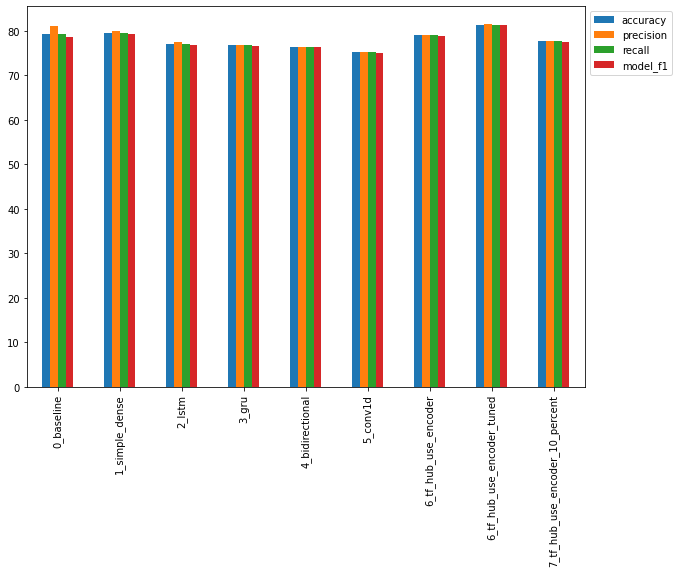

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind='bar', figsize = (10, 7)).legend(bbox_to_anchor= (1.0, 1.0));

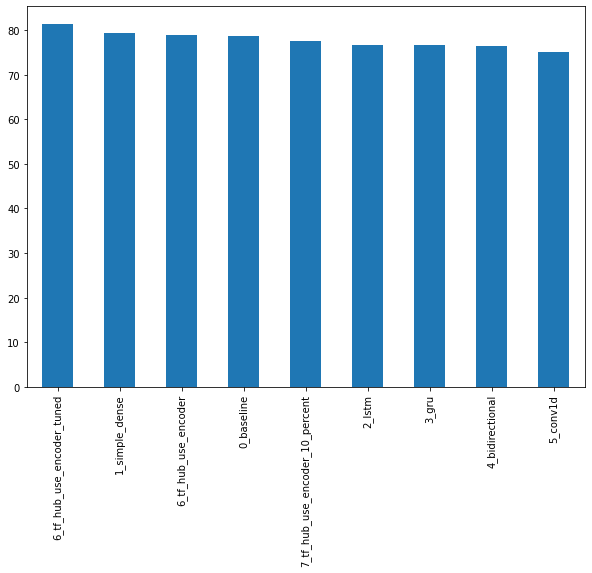

In [ ]:
# Sort model results by F1-score
all_model_results.sort_values('model_f1', ascending=False)['model_f1'].plot(kind='bar', figsize=(10,7));

## Uploading our model training logs to Tensorboard.dev
We can further inspect our model's performance using TensorBoard.dev: https://tensorboard.dev/

In [ ]:
# View Tensorboard logs of transfer learning modelling experiments (plus all of our other models)
# Upload TensorBoard dev records

!tensorboard dev upload --logdir ./model_logs/ \
--name "NLP Modelling Experiments ZTM TF Course Video" \
--description "Comparing multiple different type of model\ architectures on the Kaggle Tweets text classification dataset" \
--one_shot # exit the uploader once uploading is finished

In [ ]:
# See the previous tensorboard dev experiments you've run...
#!tensorboard dev list

In [ ]:
# If you need to to delete and experiment from TensorBoard, you can run the following:
#!tensorboard dev delete --experiment_id 

> 📖 **Resource:** TensorBoard is great for quickly tracking experiments but for larger experiments tracking options, check out Weights & Biases

## Saving and loading a trained model

There are two main formats to save a model to in Tensorflow:
1. The HDF5 format 
2. The `SavedModel` format (this is default when using TensorFlow).

In [ ]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6_1.save('model_6.h5')

In [ ]:
# Load Model with custom Hub Layer (required HDF5 format)
loaded_model_6_1 = tf.keras.models.load_model('./model_6.h5',
                                              custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
# How does our loaded model perform?
loaded_model_6_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 9ms/step - loss: 0.4264 - accuracy: 0.8136


[0.4264417886734009, 0.8136482834815979]

In [ ]:
# SaveModel format (default)
model_6_1.save('model_6_SaveModel_format')

INFO:tensorflow:Assets written to: model_6_SaveModel_format/assets


INFO:tensorflow:Assets written to: model_6_SaveModel_format/assets


In [ ]:
# Load 
loaded_model_6_1_SavedModel_format = tf.keras.models.load_model('model_6_SaveModel_format')

In [ ]:
# Evaluate model in SavedModel format
loaded_model_6_1_SavedModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 9ms/step - loss: 0.4264 - accuracy: 0.8136


[0.4264417886734009, 0.8136482834815979]